# eda
なんかしたいとき

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import schema

In [3]:
transactions = pd.read_pickle('input/transformed/transactions_train.pkl')
articles = pd.read_pickle('input/transformed/articles.pkl')
customers = pd.read_pickle('input/transformed/customers.pkl')

In [4]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id,customer_id_idx,article_id_idx
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,1,2,40179
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,1,2,10520
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,1,7,6387
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,1,7,46304
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,1,7,46305
...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,1,1371691,104961
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,1,1371691,100629
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,0,1371721,104053
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,0,1371747,88521


In [5]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,product_group_name_idx,graphical_appearance_no_idx,colour_group_code_idx,perceived_colour_value_id_idx,perceived_colour_master_id_idx,department_no_idx,index_code_idx,index_group_no_idx,section_no_idx,garment_group_no_idx
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,0,0,0,0,0,7,0,0,30,2
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,0,0,2,2,2,7,0,0,30,2
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,0,3,11,1,2,7,0,0,30,2
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,4,0,0,0,0,155,7,0,5,4
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,4,0,2,2,2,155,7,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,0953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,7,6,0,0,0,182,2,3,16,13
105538,0953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,0,0,0,0,0,26,0,0,15,0
105539,0956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,2,0,0,0,0,28,0,0,12,0
105540,0957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,3,0,0,0,0,109,1,2,25,1


In [10]:
articles.product_code.nunique(), len(articles)

(47224, 105542)

In [21]:
articles[schema.ARTICLES].describe()

,article_id_idx,product_type_no_idx,product_group_name_idx,graphical_appearance_no_idx,colour_group_code_idx,perceived_colour_value_id_idx,perceived_colour_master_id_idx,department_no_idx,index_code_idx,index_group_no_idx,section_no_idx,garment_group_no_idx
count,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,52770.500000,12.751701,1.728847,2.880891,8.116617,1.390773,3.771058,72.848004,2.976502,1.101325,15.608516,5.411353
std,30467.495393,15.257395,2.102621,4.763365,9.480345,1.527010,3.944339,65.094124,2.684084,1.129065,13.037320,5.195072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26385.250000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,19.000000,1.000000,0.000000,4.000000,1.000000
50%,52770.500000,7.000000,1.000000,1.000000,4.000000,1.000000,2.000000,53.000000,2.000000,1.000000,12.000000,4.000000
75%,79155.750000,18.000000,3.000000,4.000000,13.000000,2.000000,6.000000,114.000000,5.000000,2.000000,25.000000,9.000000
max,105541.000000,131.000000,18.000000,29.000000,49.000000,7.000000,19.000000,298.000000,9.000000,4.000000,56.000000,20.000000


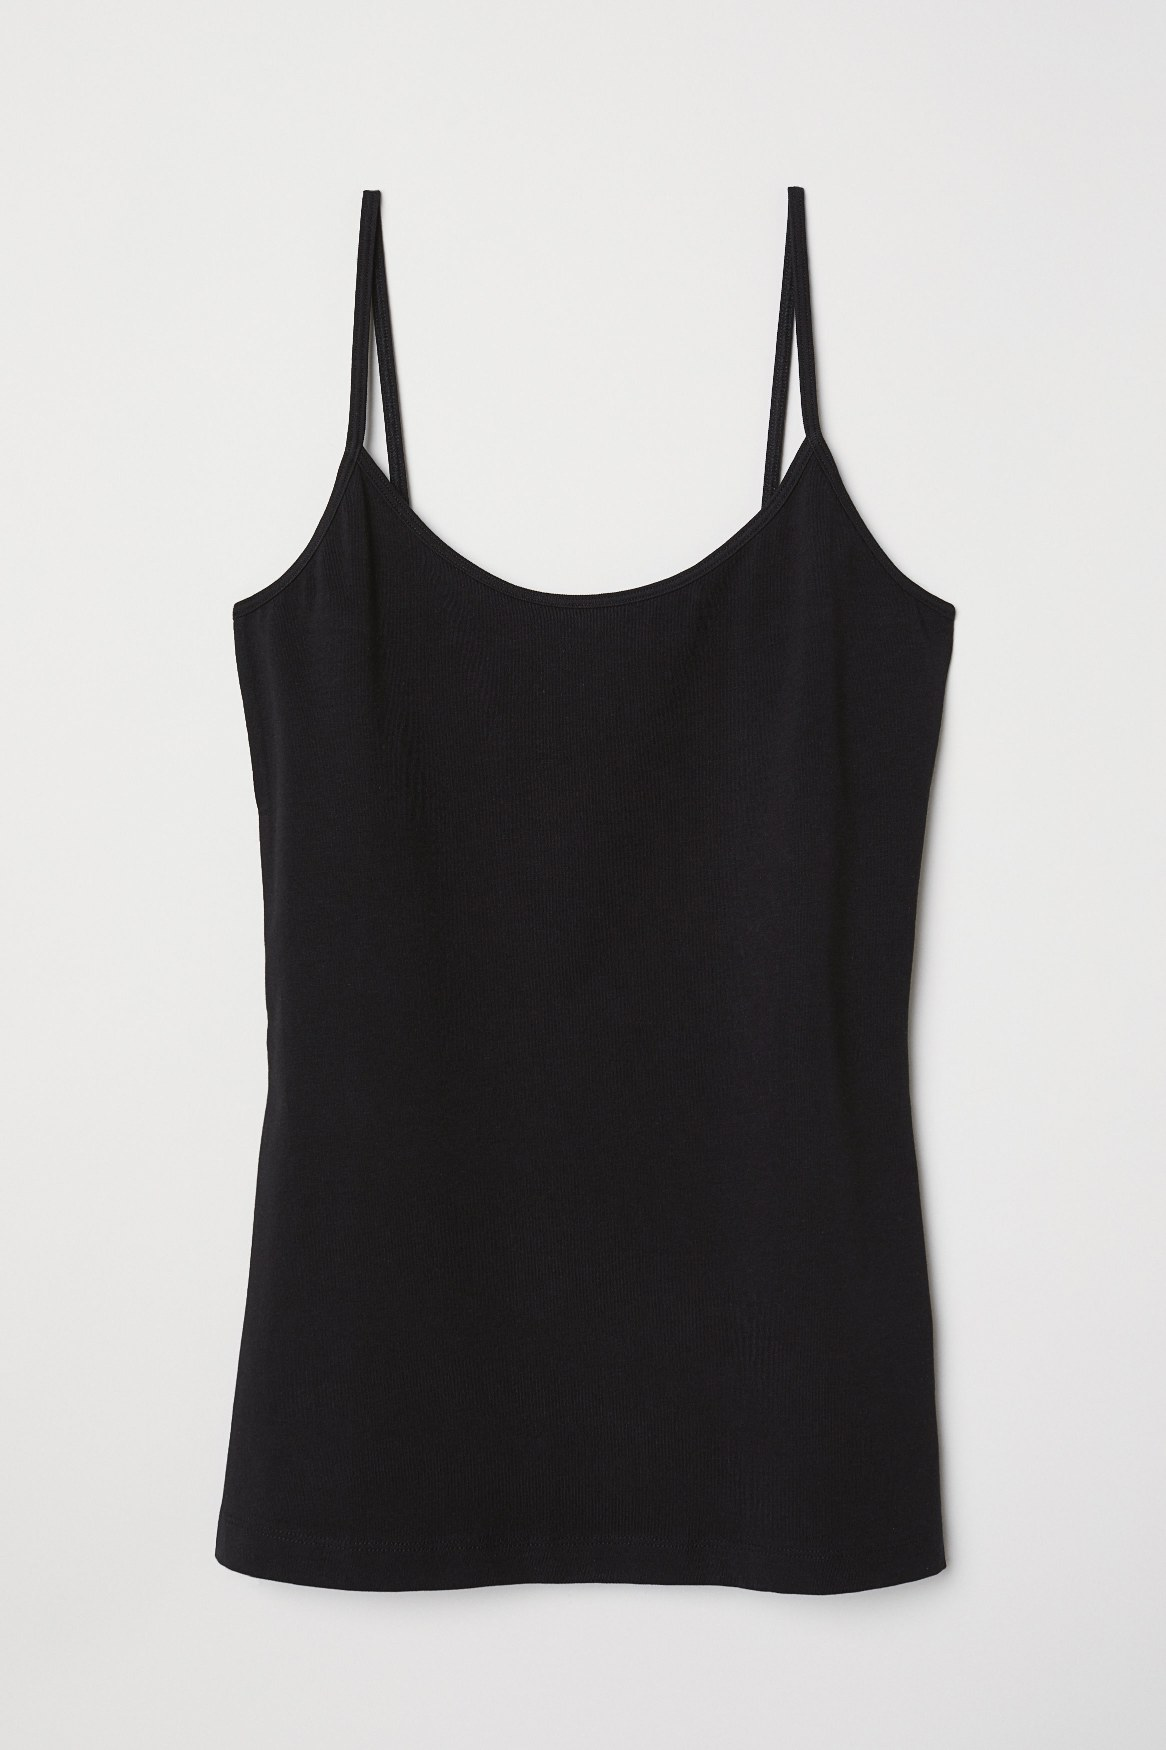

In [31]:
from IPython.display import Image, display
img = ['input/transformed/images/0.jpg', width=100, height=100)] * 1
display(*img)

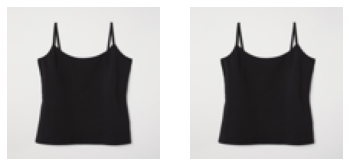

In [59]:
img = Image.open('input/transformed/images/0.jpg').resize((100, 100))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img)

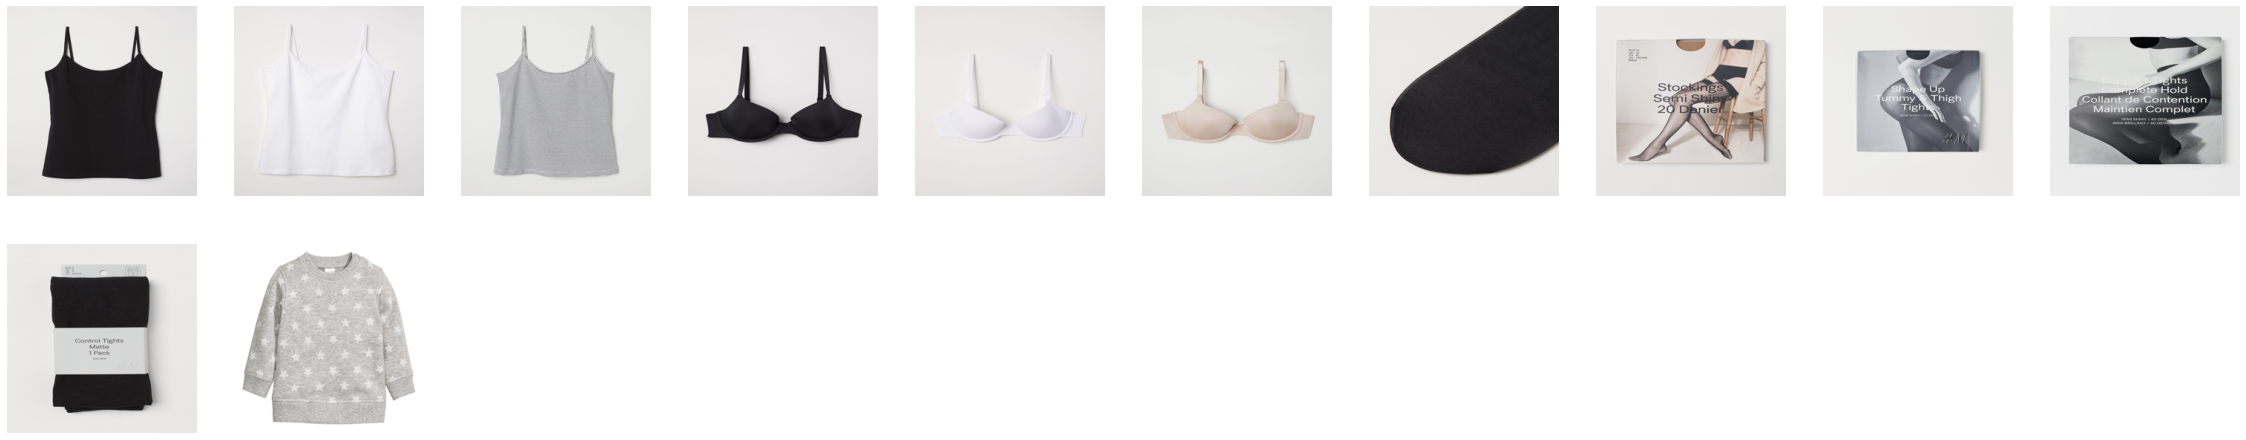

In [78]:
def plot_images(idxs: list[int]):
    paths = [f'./input/transformed/images/{idx}.jpg' for idx in idxs]
    columns = 10
    n = len(idxs)
    rows = (n + columns - 1) // columns
    plt.figure(figsize=(4 * columns, 4 * rows))
    for i, path in enumerate(paths):
        plt.subplot(rows, columns, i + 1)
        img = Image.open(path).resize((256, 256))
        plt.axis('off')
        plt.imshow(img)
    plt.show()

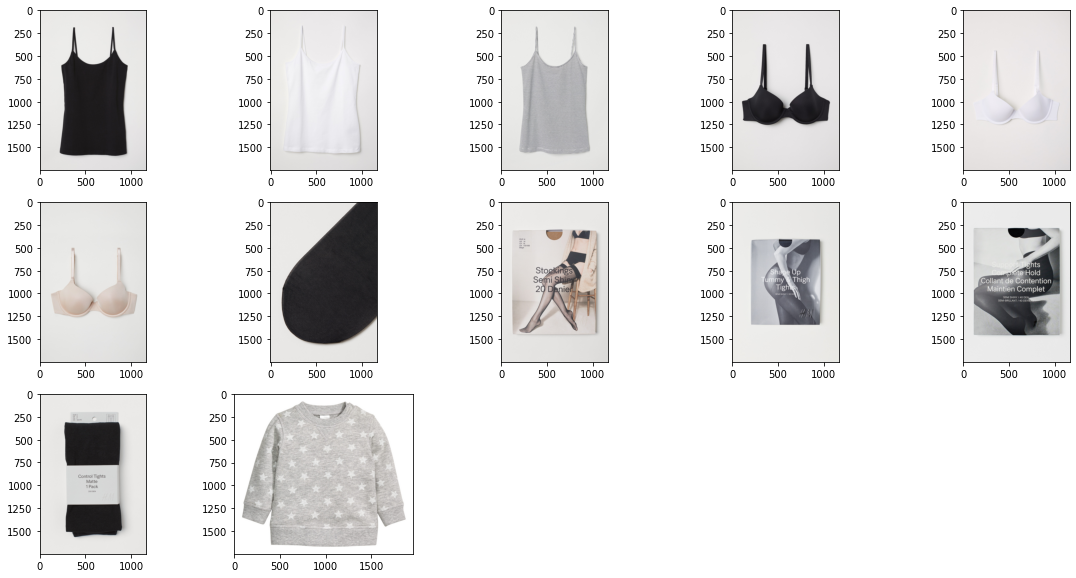

In [44]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in [f'input/transformed/images/{i}.jpg' for i in range(12)]:
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)

TypeError: Image data of dtype <U30 cannot be converted to float

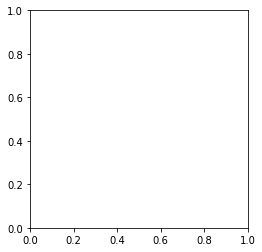

In [33]:
plt.imshow('input/transformed/images/0.jpg')

In [78]:
popular_id = 2236
a_2018 = transactions_2018.query("article_id_idx == @popular_id").groupby(['md']).size().reset_index(name='sz')
a_2019 = transactions_2019.query("article_id_idx == @popular_id").groupby(['md']).size().reset_index(name='sz')

In [79]:
b_2018 = a_2018.query("'08-01' <= md")
b_2019 = a_2019.query("'08-01' <= md")

<BarContainer object of 151 artists>

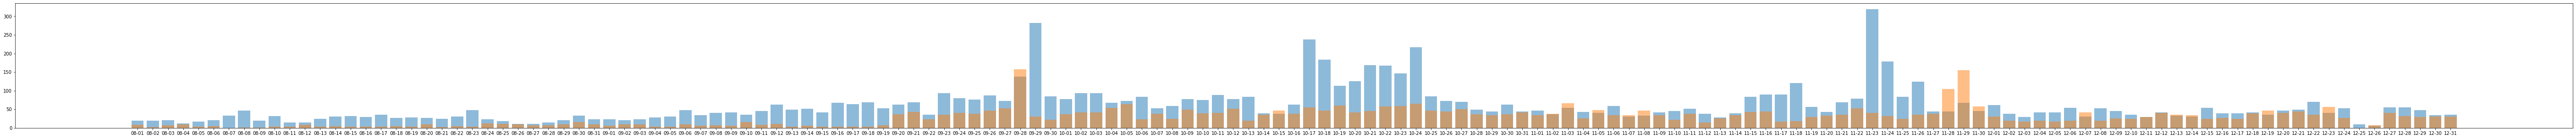

In [80]:
plt.figure(figsize=(100, 5))
plt.bar(b_2018.md, b_2018.sz, alpha=0.5)
plt.bar(b_2019.md, b_2019.sz, alpha=0.5)

In [9]:
import spotlight

In [10]:
from spotlight.interactions import Interactions
from spotlight.factorization.implicit import ImplicitFactorizationModel

In [11]:
interactions = Interactions(transactions_train.customer_id_idx.values, transactions_train.article_id_idx.values)

In [18]:
model = ImplicitFactorizationModel(loss='bpr', embedding_dim=256, n_iter=1, batch_size=32, learning_rate=0.005, use_cuda=True)

In [19]:
interactions

<Interactions dataset (1371978 users x 105540 items x 765403 interactions)>

In [20]:
model.fit(interactions, verbose=True)

RuntimeError: CUDA out of memory. Tried to allocate 1.31 GiB (GPU 0; 10.92 GiB total capacity; 5.67 GiB already allocated; 1.09 GiB free; 5.68 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

False